<a href="https://colab.research.google.com/github/MercySamoei/MachineLearning/blob/main/fraud(withSMOTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


In [119]:
data = pd.read_csv('fraud.csv')

In [120]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [121]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [123]:
total_missing=data.isnull().sum().sort_values(ascending=False)
percent=data.isnull().sum().sort_values(ascending=False)/data.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False) 
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing


In [124]:

# data.dropna(subset=['V8',	'V9', 'V10', 'V11', 'V12', 'V13', 'V19', 'V14', 'V17', 
#                     'V18','Class', 'V19',	'V21', 'V22',	'V23',	'V24',	'V25',	'V26'],	
#                     'V27',	'V28', 'V15', 'V16', 'V20', inplace= True)

import pandas as pd

# Drop rows with missing values in specific columns
data.dropna(subset=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V17', 'V18', 'V19', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V15', 'V16', 'V20'], inplace=True)


In [125]:
# class_mode = data['Class'].mode()[0]
# data['Class'].fillna(class_mode, inplace=True)

# amount_mean = data.groupby('Class')['Amount'].mean()
# data['Amount'].fillna(data['Class'].map(amount_mean), inplace=True)

# v28_mean = data.groupby('Class')['V28'].mean()
# data['V28'].fillna(data['Class'].map(v28_mean), inplace=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

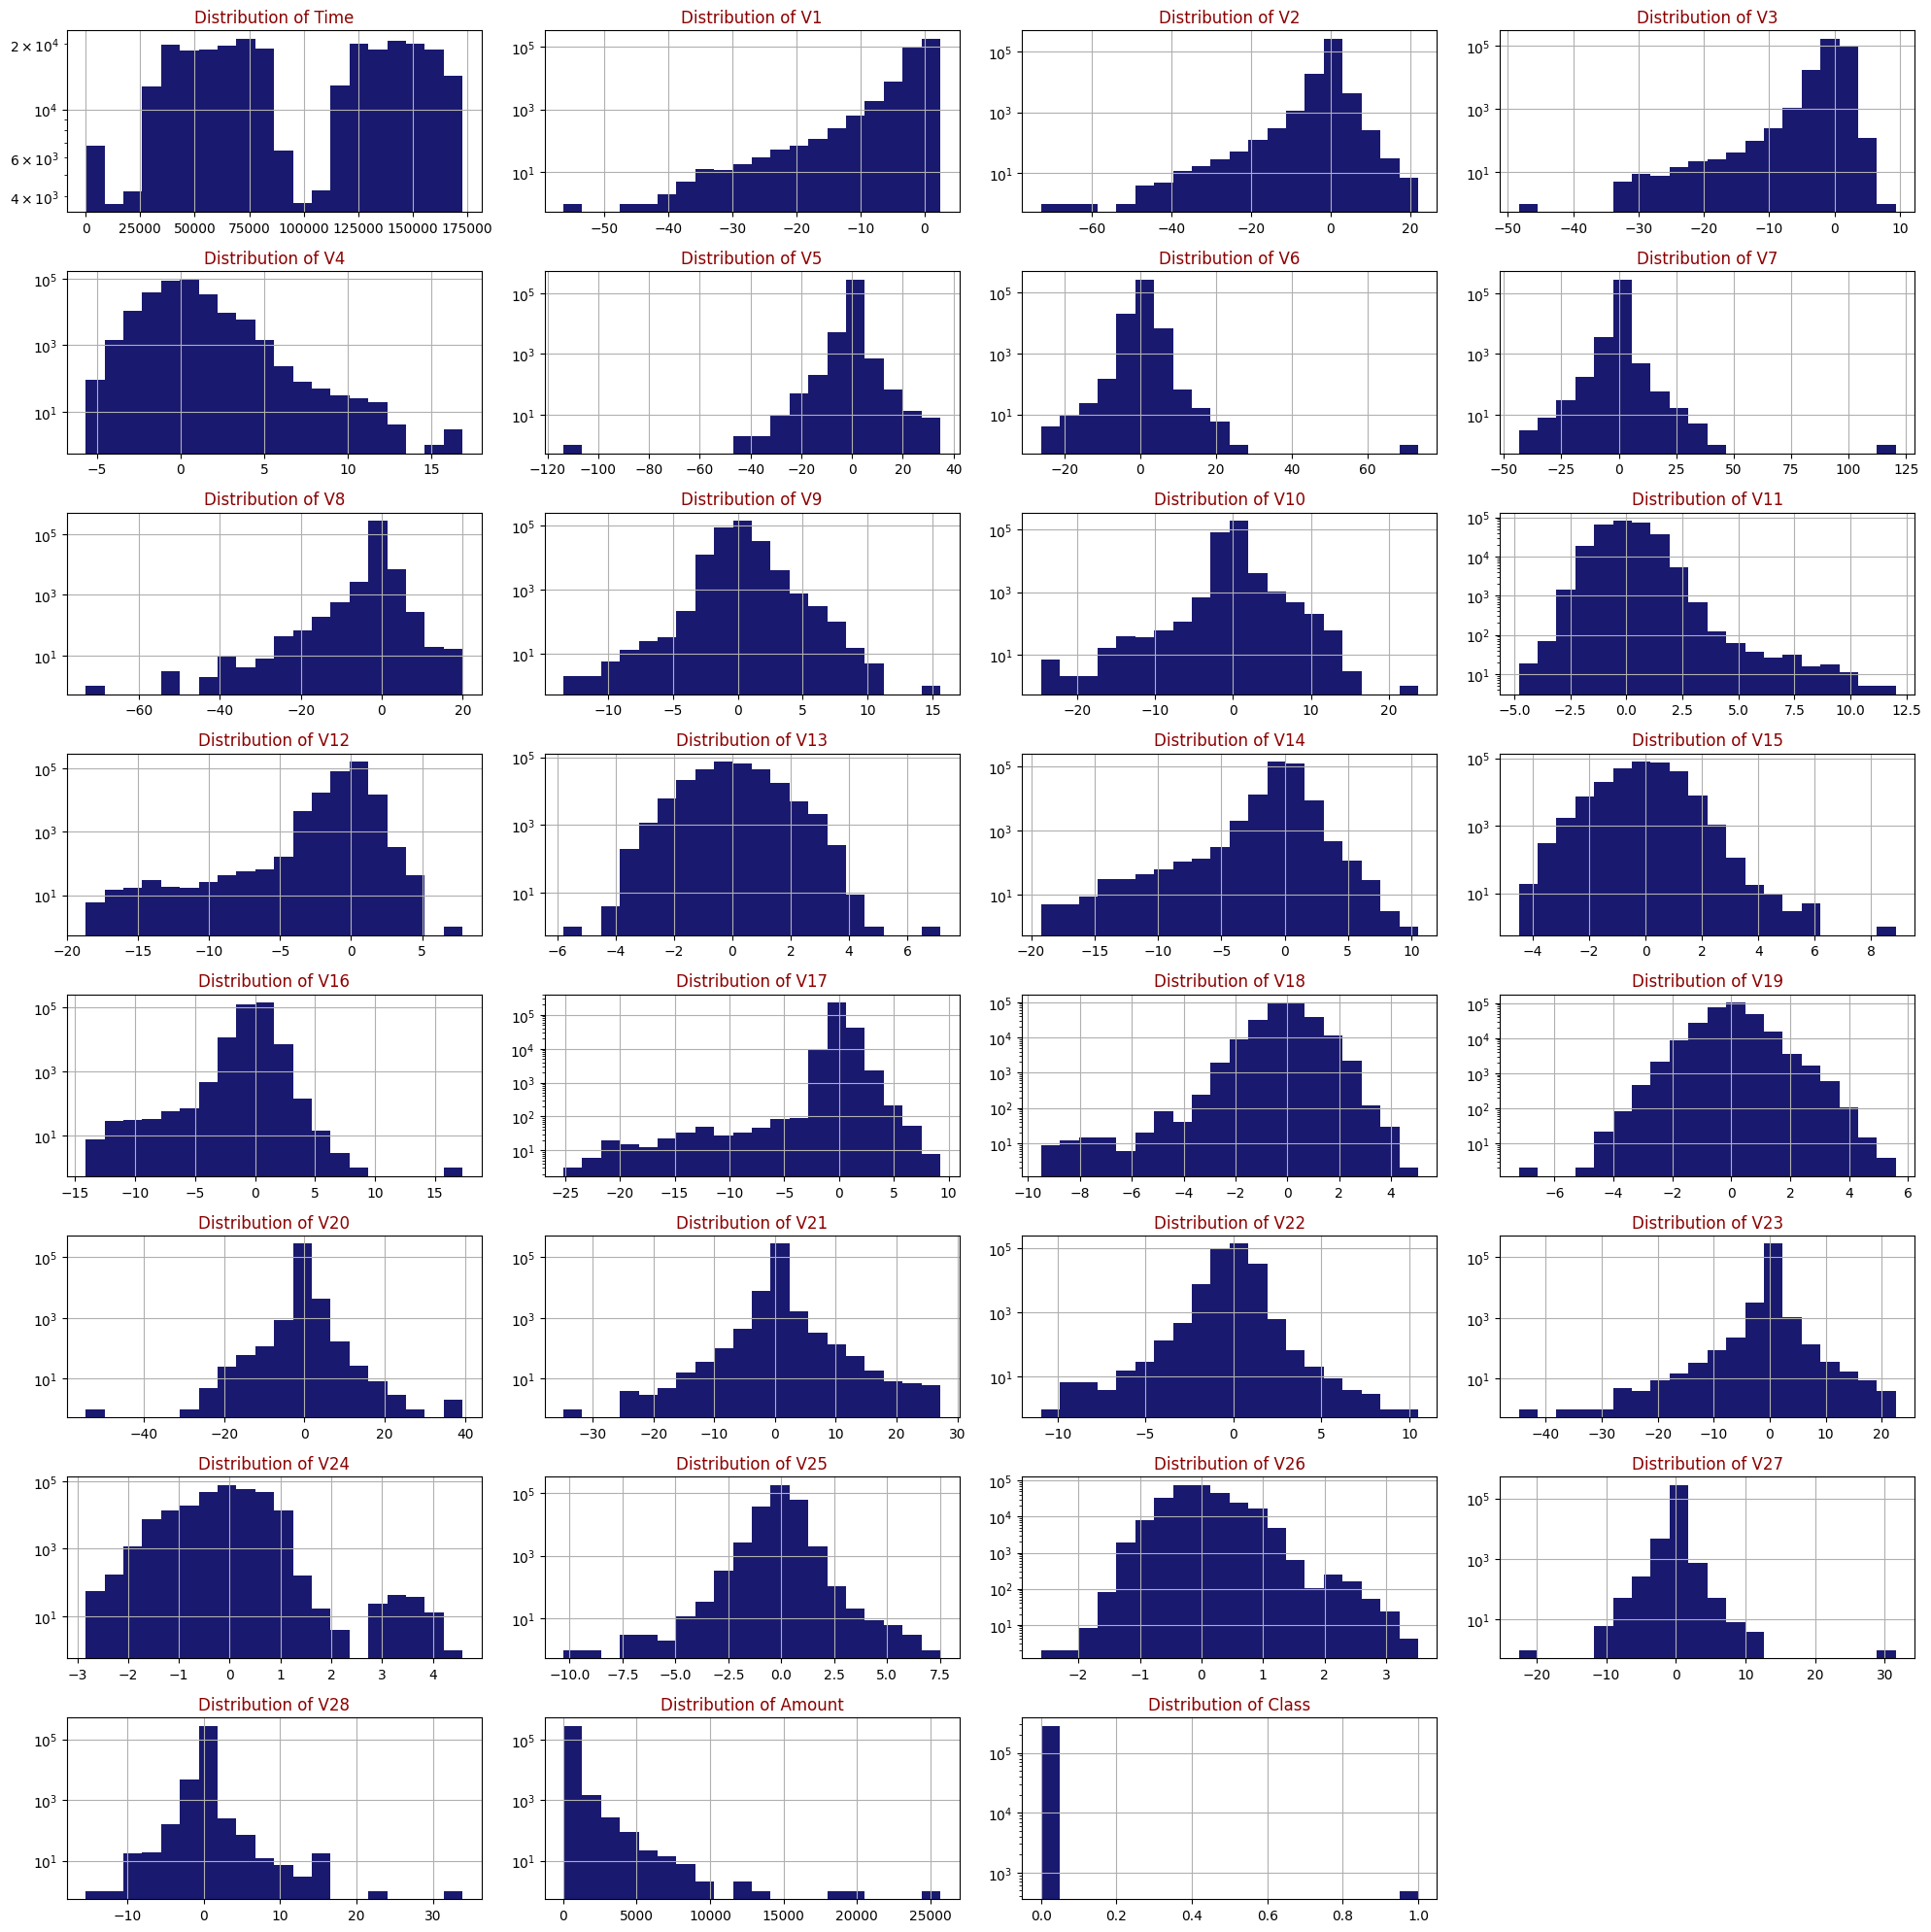

In [127]:
def draw_histograms(data, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        data[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(f'Distribution of {feature}', color='Darkred')
        ax.set_yscale('log')

    fig.tight_layout()
    plt.show()

draw_histograms(data, data.columns, 8, 4)


Check our target variable to know how imbalanced it is.

In [128]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [129]:
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]

In [130]:
X= data.drop('Class', axis=1)
Y= data['Class']

In [131]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [132]:
X = data.drop(columns='Class', axis=1)
Y = data['Class']

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [134]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [135]:
model = LogisticRegression()

In [136]:
# from sklearn.impute import SimpleImputer

# # Instantiate the imputer object
# imputer = SimpleImputer()

# # Impute missing values in X_train
# X_train_imputed = imputer.fit_transform(X_train)

# # Fit the model with the imputed data
# model.fit(X_train_imputed, Y_train)


In [137]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X, Y)

In [145]:

# Check the values of X_train and Y_train
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_train samples:", X_train.shape)
print("Y_train samples:", Y_train.shape)


X_train shape: (568630, 30)
Y_train shape: (568630,)
X_train samples: (568630, 30)
Y_train samples: (568630,)


In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=60)

In [151]:
model = LogisticRegression()

In [152]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [154]:
print('Accuracy on Training Data : ', round(training_data_accuracy, 3))

Accuracy on Training Data :  0.999


In [155]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [156]:
print('Accuracy on Training Data : ', round(training_data_accuracy, 3))

Accuracy on Training Data :  0.999


In [157]:
cf_matrix = confusion_matrix(X_train_prediction, Y_train)
cf_matrix

array([[227328,    118],
       [   123,    276]])

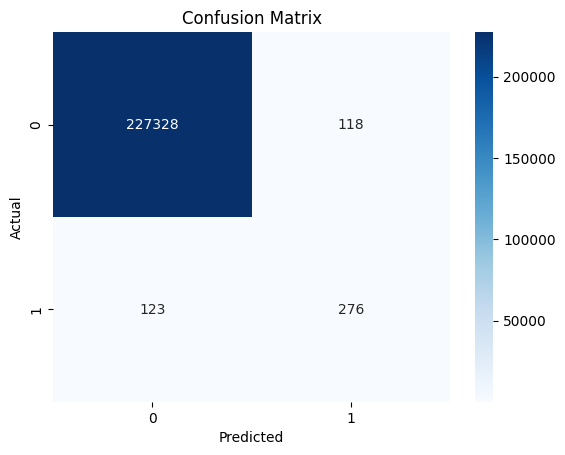

In [158]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix') #fraud = 1, legit=0
plt.show()

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()

param_grid = {'C': [0.1, 1, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [160]:
best_model = grid_search.best_estimator_


In [161]:
y_pred = best_model.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9986833327481479
Precision: 0.6210526315789474
Recall: 0.6020408163265306
F1 score: 0.6113989637305699


End at the moment

In [163]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the models
# logistic_model = LogisticRegression()
# random_forest_model = RandomForestClassifier()

# # Define the hyperparameter grids for GridSearch
# logistic_param_grid = {'C': [0.1, 1, 10]}
# random_forest_param_grid = {'n_estimators': [100, 200, 300]}

# # Perform hyperparameter tuning with GridSearchCV for Logistic Regression
# logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5)
# logistic_grid_search.fit(X_train, y_train)

# # Perform hyperparameter tuning with GridSearchCV for Random Forest
# random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=5)
# random_forest_grid_search.fit(X_train, y_train)

# # Get the best models and their predictions
# best_logistic_model = logistic_grid_search.best_estimator_
# best_random_forest_model = random_forest_grid_search.best_estimator_

# logistic_predictions = best_logistic_model.predict(X_test)
# random_forest_predictions = best_random_forest_model.predict(X_test)

# # Evaluate the models
# logistic_accuracy = accuracy_score(y_test, logistic_predictions)
# random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# print('Logistic Regression Accuracy:', logistic_accuracy)
# print('Random Forest Accuracy:', random_forest_accuracy)
